<a href="https://colab.research.google.com/github/RafaelSldev/BigData/blob/main/Trabalho_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------------------------
		  Base de Dados Casos de Dengue no Ceará
-----------------------------------------------------------------------------
    ano  casos_provaveis  casos_confirmados  ocorreu_hospitalizacao    cura  \
0  2023           14.458             13.981                 742.000  14.023   
1  2022           42.774             39.663                   1.443  39.692   
2  2021           35.451             33.207                   1.491  33.219   
3  2020           24.034             21.253                   1.214  21.301   
4  2019           16.234             15.527                 987.000  15.611   

   obito  
0      8  
1     21  
2     21  
3     11  
4     13  
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
			     Análise Gráfica
-----------------------------------------------------------------------------


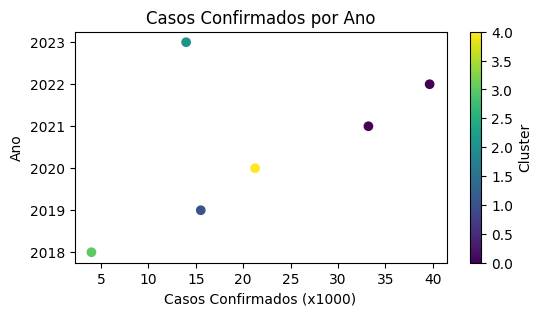

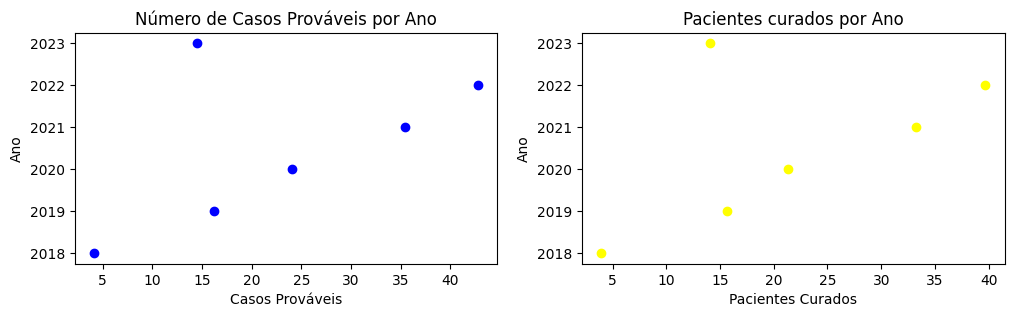

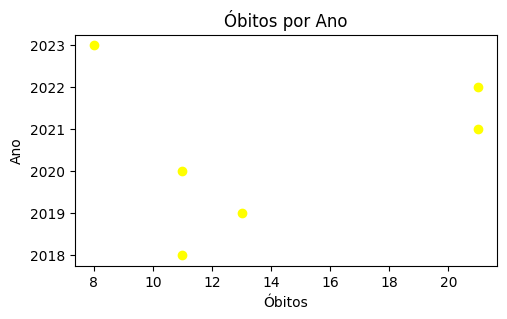


Previsões:


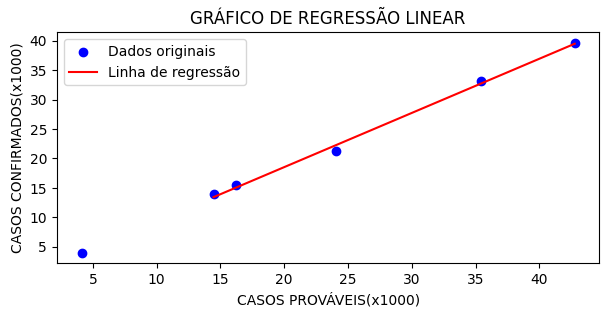

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregar o CSV
df = pd.read_csv('dataBase(in).csv')

# Mostrar os dados carregados na tela
print('-----------------------------------------------------------------------------')
print("\t\t  Base de Dados Casos de Dengue no Ceará")
print('-----------------------------------------------------------------------------')
print(df.head())

# 2. Pré-processamento: normalização dos dados
features = ['ano', 'casos_provaveis', 'casos_confirmados', 'ocorreu_hospitalizacao', 'cura', 'obito']
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
print('\t\t\t     Análise Gráfica')
print('-----------------------------------------------------------------------------')

# Remove linhas contendo 'Total' em qualquer uma das colunas de recursos
df = df[~df[features].apply(lambda row: row.astype(str).str.contains('Total').any(), axis=1)]  # <---

# Converte as colunas de recursos em numérico
df[features] = df[features].apply(pd.to_numeric, errors='coerce')  # <---

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])  # <---

# 3. Aplicar K-means
k = 5  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)  # <---

# 4. Visualizar os clusters (Mantendo este gráfico de dispersão)
plt.figure(figsize=(6, 3))

# Nomes das colunas para corresponder ao DataFrame
plt.scatter(df['casos_confirmados'], df['ano'], c=df['Cluster'], cmap='viridis', marker='o')  # <---
plt.xlabel('Casos Confirmados (x1000)')
plt.ylabel('Ano')
plt.title('Casos Confirmados por Ano')
plt.colorbar(label='Cluster')
plt.show()

# 5. Gráficos de Linha do Tempo (Evolução ao longo dos Anos)
plt.figure(figsize=(12, 8))  # <---

# Gráfico: Número de Casos Prováveis vs Ano
plt.subplot(2, 2, 1)
plt.plot(df['ano'], df['casos_provaveis'], marker='o', color='blue', label='Casos Prováveis')  # <---
plt.title('Número de Casos Prováveis por Ano')
plt.xlabel('Ano')
plt.ylabel('Casos Prováveis')
plt.grid(True)  # <---

# Gráfico: Número de Casos Confirmados vs Ano
plt.subplot(2, 2, 2)
plt.plot(df['ano'], df['casos_confirmados'], marker='o', color='green', label='Casos Confirmados')  # <---
plt.title('Número de Casos Confirmados por Ano')
plt.xlabel('Ano')
plt.ylabel('Casos Confirmados')
plt.grid(True)  # <---

# Gráfico: Número de Pacientes Curados vs Ano
plt.subplot(2, 2, 3)
plt.plot(df['ano'], df['cura'], marker='o', color='yellow', label='Pacientes Curados')  # <---
plt.title('Número de Pacientes Curados por Ano')
plt.xlabel('Ano')
plt.ylabel('Pacientes Curados')
plt.grid(True)  # <---

# Gráfico: Número de Óbitos vs Ano
plt.subplot(2, 2, 4)
plt.plot(df['ano'], df['obito'], marker='o', color='red', label='Óbitos')  # <---
plt.title('Número de Óbitos por Ano')
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.grid(True)  # <---

plt.tight_layout()  # <---
plt.show()

# 6. Regressão Linear (Casos Prováveis vs Casos Confirmados)

X = df['casos_provaveis'].values.reshape(-1, 1)
y = df['casos_confirmados'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)  # <---

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print("\nPrevisões:")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# Gráfico de regressão linear
plt.figure(figsize=(7, 3))
plt.scatter(X, y, color="blue", label="Dados originais")  # <---
plt.plot(X_test, y_pred, color="red", label="Linha de regressão")  # <---
plt.xlabel("CASOS PROVÁVEIS (x1000)")
plt.ylabel("CASOS CONFIRMADOS (x1000)")
plt.title("GRÁFICO DE REGRESSÃO LINEAR")
plt.legend()
plt.grid(True)  # <---
plt.show()
